# Hands On Telescope Data Handling with Astropy

This notebook introduces how to deal with DL3 data from current IACTs and other HE or VHE instruments. The Data Level 3 (DL3) format is described [here](https://arxiv.org/abs/2101.06018)

Please refer to [this notebook](https://github.com/arqus-gamma/arqus_school_2022/blob/main/hands_on/1_read_data/Read_data_with_astropy_hands_on.ipynb) for preliminary introduction

## Table of contents
- [Initial Setup](#Initial-Setup)
- [Select Data Sample](#Select-Data-Sample)
- [Looking inside the files](#Looking-inside-the-files)
   - [PRIMARY HDU](#PRIMARY-HDU)
   - [EVENT HDU](#EVENT-HDU)
     - [Sky Distribution](#Sky-Distribution)
     - [Energy Distribution](#Event-Energy-Distribution)
   - [Effective Area HDU](#Effective-Area)
   - [Gammaness HDU](#Gammaness)
- [Definition of the Signal Search Region](#Definition-of-the-signal-search-region)
- [Theta2 Plot](#Theta2-Plot)
- [Final Considerations](#Final-Considerations)

## Initial Setup
[back to top](#Table-of-contents)

As usual, we start by installing some standards packages. We try to be minimal and install only those stricly required.
Check package versions. All examples should work with Astropy > 2.0 and Numpy > 1.11

In [6]:
%matplotlib inline  
import matplotlib.pyplot as plt

In [31]:
import numpy as np

import astropy
from astropy import units as u
from astropy import constants as const
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy.time import Time
from astropy.table import Table
from astropy.io import fits
from astropy.visualization.wcsaxes import SphericalCircle
from astropy.wcs import WCS


print('numpy:', np.__version__)
print('astropy:', astropy.__version__)

numpy: 1.23.2
astropy: 5.1


## Select Data Sample
[back to top](#Table-of-contents)

In this part we start selecting the data of interest for the further analysis.

Let's first check what's in the data folder. The mark `!` specifies a terminal line command

In [8]:
!ls ../../data/

README.md          crab_nebula        ic310              ngc1275
arqus_filelist.txt download_data.sh   mrk421             pks2155


We see that we have 4 targets, as well the complete list of files. Let's open one target, the 'crab nebula'. This dataset comes from a joint publication about that source with a small subsample of data from different experiments. Normally data are private this is the reason for the 'small dataset' for that source.


In [11]:
!ls ../../data/

README.md          crab_nebula        ic310              ngc1275
arqus_filelist.txt download_data.sh   mrk421             pks2155


There are several sources! First thing you can do is going to the TeVCAT and learn something about them. Here we have a look the data, let's check them one by one.

In [9]:
#!ls ../../data/crab_nebula/
#!ls ../../data/pks2155/

fact    fermi   hess    magic   other   veritas


We see that different targets were observed by different telescopes. Great! Let's know pick one.

In [10]:
#!ls ../../data/crab_nebula/magic
#!ls ../../data/pks2155/hess/
#!ls ../../data/ic310/magic
!ls ../../data/ngc1275/magic

20170101_05059487_DL3_NGC1275-W0.40+157.fits
20170101_05059488_DL3_NGC1275-W0.40+337.fits
20170101_05059489_DL3_NGC1275-W0.40+058.fits
20170101_05059490_DL3_NGC1275-W0.40+238.fits
20170101_05059497_DL3_NGC1275-W0.40+238.fits
20170101_05059498_DL3_NGC1275-W0.40+157.fits
20170101_05059499_DL3_NGC1275-W0.40+337.fits
20170101_05059500_DL3_NGC1275-W0.40+337.fits
hdu-index.fits.gz
obs-index.fits.gz


## Looking inside the files
[back to top](#Table-of-contents)


So we have several runs. Let's open one of them. 

In [13]:
#fits_file = fits.open('../../data/crab_nebula/magic/run_05029747_DL3.fits')

fits_file = fits.open('../../data/ngc1275/magic/20170101_05059487_DL3_NGC1275-W0.40+157.fits')

#fits_file = fits.open('../../data/pks2155/hess/hess_dl3_dr1_obs_id_033787.fits.gz')

#fits_file = fits.open('../../data/ic310/magic/20121113_05020910_DL3_NGC1275-W0.40+238.fits')

In [ ]:
#m astropy.table import Table, hstack

#t1 = Table.read('../../data/ngc1275/magic/20170101_05059487_DL3_NGC1275-W0.40+157.fits', format='fits')
#t2 = Table.read('../../data/ngc1275/magic/20170101_05059498_DL3_NGC1275-W0.40+157.fits', format='fits')
#new = hstack([t1, t2])
#new.write('combined.fits')

To see what's inside we have a look at the Data Units. Let's check the header data unit (HDU) by calling `.info()`:

In [14]:
fits_file.info()

Filename: ../../data/ngc1275/magic/20170101_05059487_DL3_NGC1275-W0.40+157.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  EVENTS        1 BinTableHDU     62   12614R x 8C   [1K, 1D, 1E, 1E, 1E, 1E, 1E, 1E]   
  2  GTI           1 BinTableHDU     24   1R x 2C   [1D, 1D]   
  3  RAD_MAX       1 BinTableHDU     33   1R x 5C   [28E, 28E, 1E, 1E, 28E]   
  4  EFFECTIVE AREA    1 BinTableHDU     35   1R x 5C   [40E, 40E, 1E, 1E, 40E]   
  5  ENERGY DISPERSION    1 BinTableHDU     36   1R x 7C   [40E, 40E, 28E, 28E, 1E, 1E, 1120E]   


We see that we have:
* PRIMARY which contains file-related information
* EVENTS contains the actual event list of our interest
* GTI contains some timing information
* EFFECTIVE AREA is an important experiment information  
* ENERGY DISPERSION is a second important experimental information

### PRIMARY HDU
[back to top](#Table-of-contents)

We import the PRIMARY and check what is inside. The PRIMARY contains only a short header and no data

In [15]:
primary = fits_file['PRIMARY'] 
primary.header
#primary.data

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

### EVENT HDU
[back to top](#Table-of-contents)

Let's look at the EVENT HDU. Here are the events information. First with the header

In [19]:
events = fits_file['EVENTS'] 
events.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   40 / width of table in bytes                        
NAXIS2  =                12614 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    8 / number of fields in each row                   
TTYPE1  = 'EVENT_ID'           / label for field   1                            
TFORM1  = '1K      '           / data format of field: 8-byte INTEGER           
TTYPE2  = 'TIME    '           / label for field   2                            
TFORM2  = '1D      '           / data format of field: 8-byte DOUBLE            
TUNIT2  = 's       '        

Here are a bunch of interesting 'observational' parameter. Let's save some useful parameters

Of all the entries, some are worth discussing

```
OBS_ID  =              5059487 / unique observation identifier                  
TSTART  =         4.361391E+08 / [s] observation start time                     
TSTOP   =         4.361403E+08 / [s] observation end time                       
ONTIME  =                1193. / [s] total good time (sum of GTIs)              
LIVETIME=             1178.607 / [s] total effective time                       
OBS_MODE= 'POINTING'           / observation mode                               
RA_OBJ  =                49.95 / [deg] source RA                                
DEC_OBJ =             41.51167 / [deg] source DEC                               
OBS_MODE= 'Wobble  '           / observation mode                               
RA_PNT  =             49.45417 / [deg] observation pointing RA                  
DEC_PNT =             41.66806 / [deg] observation pointing DEC                 
ALT_PNT =             76.89065 / [deg] average altitude pointing                
AZ_PNT  =            -6.315182 / [deg] average azimuth pointing
```

Let's save some parameters for my analysis

In [20]:
ra_obj  = events.header['RA_OBJ']
dec_obj = events.header['DEC_OBJ']
ra_pnt  = events.header['RA_PNT']
dec_pnt = events.header['DEC_PNT']  

Being sky positions, it is more convenient to convert them in

In [23]:
pointing_pos =  SkyCoord( events.header.get('RA_PNT') *u.deg,   events.header.get('DEC_PNT') *u.deg )
source_pos   =  SkyCoord.from_name(events.header.get('OBJECT'))

pointing_pos
source_pos

<SkyCoord (ICRS): (ra, dec) in deg
    (49.95066663, 41.5116969)>

Is there a difference between them? Let's check the different of the two. We can use the astropy `separation` method

In [25]:
offset = source_pos.separation(pointing_pos)
offset.to( u.deg).value

0.40291469991647577

There is a difference of 0.4 deg between the true source position and the pointing position. Why? Because IACTs points the targets slightly off according to the Wobble solution, for a more accurate background estimation...see later!

Besides the header, let's see what are the DATA of the EVENT HDU:


In [27]:
events.data
events.columns.names

# Better uncomment the line below and use the astropy Table class
Table(events.data)

EVENT_ID,TIME,RA,DEC,ENERGY,GAMMANESS,DETX,DETY
int64,float64,float32,float32,float32,float32,float32,float32
117,436139121.599158,49.01414,41.539272,0.10293761,0.9410159,0.3199254,-0.13709812
138,436139121.66326886,48.04316,42.417595,0.06289925,0.41138095,1.0475081,0.7366911
210,436139121.89286935,49.00081,41.941536,0.040962473,0.24814683,0.33467507,0.2649405
233,436139121.9688521,48.99533,41.803627,0.034511823,0.32546824,0.33711714,0.12696764
337,436139122.25264156,49.906765,42.391163,0.05785944,0.7387659,-0.32914373,0.7258594
355,436139122.2984954,50.021763,41.50761,0.29707232,0.8527024,-0.43491018,-0.15557902
364,436139122.31179434,49.556606,41.83252,0.115851775,0.78795886,-0.08073081,0.16200143
365,436139122.3160477,48.488037,42.43964,0.13334548,0.88278574,0.7189447,0.75967366
395,436139122.41501117,48.45039,40.33354,0.39297318,0.9098333,0.7355171,-1.3470265


We can check the whole number of events with the command

In [28]:
len(events.data)

12614

Let's see some events. Again for practicity I define some variables for later use.

## Sky Distribution
[back to top](#Table-of-contents)

We know see how events directions appear in a map

In [49]:
en  = events.data['ENERGY']
t   = events.data['TIME']
ra  = events.data['RA']
dec = events.data['DEC']
g   = events.data['GAMMANESS']
#dx  = events.data['DETX']
#dy  = events.data['DETY']

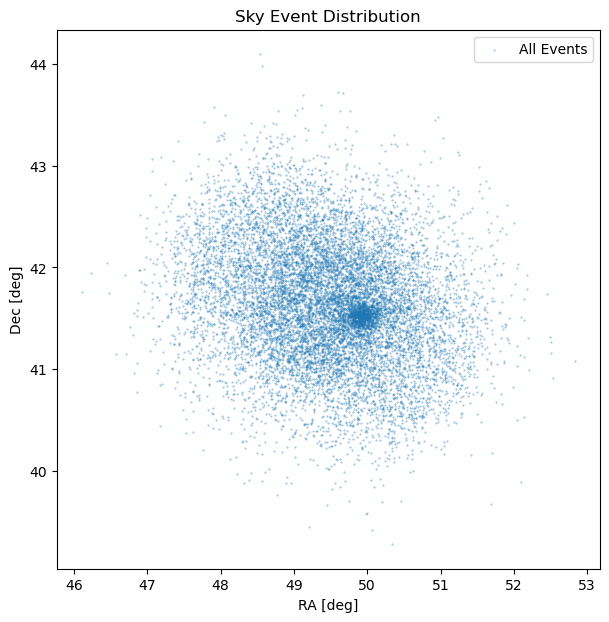

In [50]:
# Direction of the events
fig, ax =  plt.subplots(figsize=(7,7))
#ax = plt.subplot(projection=wcs)

ax.scatter(ra,dec, s=0.2, alpha=0.5, label="All Events")
#ax.scatter(ra_obj,dec_obj, marker="*", label="Object Sky coordinate")
#ax.scatter(ra_pnt,dec_pnt, marker="x", color = 'black', label="Observed coordinate")


fov = SphericalCircle( (pointing_pos.ra, pointing_pos.dec),
                    3.5 * u.deg,   edgecolor='black', facecolor='none', label="FOV")
#ax.add_patch(fov)


plt.ylabel('Dec [deg]')
plt.xlabel('RA [deg]')
plt.title('Sky Event Distribution')
ax.legend(loc="best")

## Event Energy Distribution
[Go back to TOC](#Table-of-contents)

Let's look at how the energy of the data is distributed

Text(0.5, 1.0, 'Energy distribution')

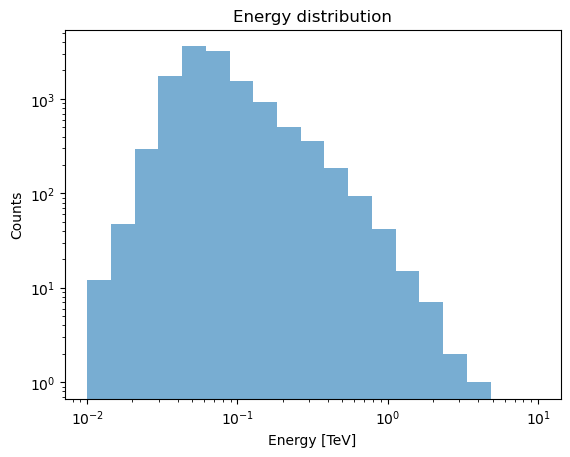

In [51]:
# The binning should be defined first
binning = np.logspace(-2,1,20)

plt.hist(en,bins=binning,alpha=0.6,log=True)
plt.xscale('log')

plt.xlabel('Energy [TeV]')
plt.ylabel('Counts')
plt.title('Energy distribution')

What we see is that we have a peak at about 0.1 TeV, a sudden increase below and a regular decrease above that value? Does this make sense? Does the target source have a peak at 0.1 TeV? 

To understand this we need to look at the effective area of the telescope.

## Effective Area
[Go back to TOC](#Table-of-contents)

The effective area is the geometrical area of an instrument multiplied with the instrument efficiency. For example, take a tennis racket. The geometrical area is the area of the net, but not the whole are of the net is efficient. In the outer rim the ball would be launched uncorrectly. For a telescope like MAGIC:
* the geometrical area is the area illuminated in the ground by the Cherenkov ligth
* the efficiency is the ratio between all events and those that are actually recorded in the instrument
The effective area is normally obtained with Monte Carlo simulations and not from the data.

In [53]:
effarea = fits_file['EFFECTIVE AREA'] 
#effarea.header
#Table(effarea.data)

#effarea.data['ENERG_LO'][0]
#effarea.data['EFFAREA'][0][0]

This look in a strange format, but the reason is because the effective area may depend on the distance from the center of the camera. Here only one effective area is simulated. Let's see how it looks like

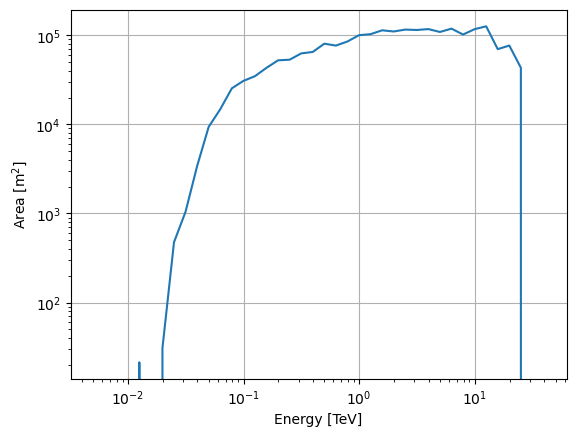

In [56]:
plt.loglog(effarea.data['ENERG_LO'][0],effarea.data['EFFAREA'][0][0])
plt.xlabel('Energy [TeV]')
plt.ylabel(r'Area [m$^2$]')
plt.grid()


One sees here that the instrument effective area is almost constant from 1 to 10 TeV. Above 10-20 TeV the effective area goes suddenly to zero, while below 0.1 TeV it decreases more slowly. Whis is that?

## Gammaness
[Go back to TOC](#Table-of-contents)

Finally, let's discuss the GAMMANESS parameter (for some files only).

Text(0, 0.5, 'Counts')

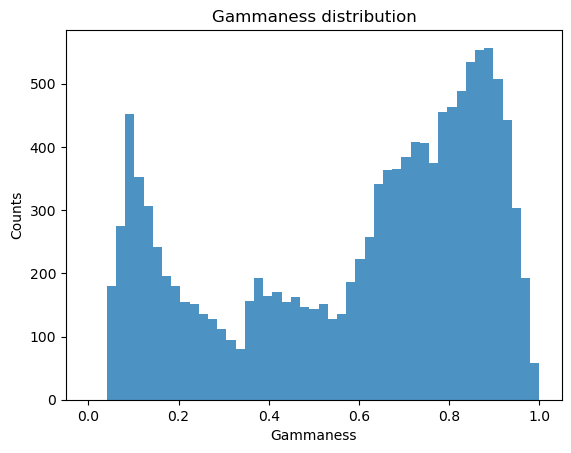

In [59]:
binning = np.linspace(0,1,50)
plt.hist(g,bins=binning,alpha=0.8)

plt.title('Gammaness distribution')
plt.xlabel('Gammaness')
plt.ylabel('Counts')

These are all events from all directions in the sky. We will learn that MOST of them are background event, while only some of them are signal events. How do we extract the good ones from the full datasample?

## Definition of the signal-search region
[Go back to TOC](#Table-of-contents)

Let's start by defining a region in which we expect the signal to be from a region where we expect to find only background. This a standard procedure called
* signal region definition
* background control region definition

The signal come from a specific direction in the sky. If the instrument had an infinite angular resolution (also one should assume no shower fluctuations), in principle all events should come from A SINGLE POINT. However, they come from a region. This region is often defined as a circle around the true target position. Circles are better identified with astropy tools.

In [80]:
source_angle = pointing_pos.position_angle(source_pos).to(u.degree)
print(source_angle*u.deg)

radius = offset/np.sqrt(2)
radius /=2
print(radius*u.deg)

# Definition of the SIGNAL region
on  = SphericalCircle( (source_pos.ra, source_pos.dec),
                    radius,   edgecolor='red', facecolor='none', label="ON REGION")


112.67010717257557 deg2
0.14245185827534143 deg2


In [81]:
# needed for
wcs = WCS(events.header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


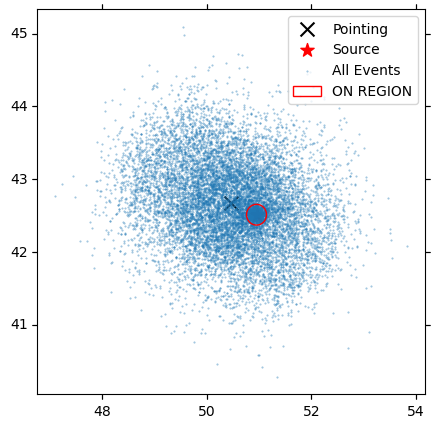

In [83]:
fig, ax =  plt.subplots(figsize=(5,5))
ax = plt.subplot(projection=wcs)


ax.scatter(pointing_pos.ra.value, pointing_pos.dec.value, marker='x', s=100, c='black', label ='Pointing'  ) 
ax.scatter(source_pos.ra.value, source_pos.dec.value, marker='*', s=100, c='red', label ='Source'  ) 
ax.scatter(ra,dec, s=0.2, alpha=0.5, label="All Events")

#ax.add_patch(fov)
ax.add_patch(on)

ax.legend(loc= "best");

Let's now create the condition to select events in the ON region

In [85]:
ra = events.data['RA'] 
dec = events.data['DEC']

cond_on = []
for i_ra,i_dec in zip(ra,dec):
    position_event = SkyCoord(  i_ra * u.deg, i_dec * u.deg, frame='icrs')

    cond_on.append( source_pos.separation(position_event) < radius )

Let's now apply the condition

In [95]:
# Selection
evt_on = events.data[cond_on]
#evt = events.data[cond_on * (events.data['ENERGY'] > 0.1) * (events.data['ENERGY'] < 10)]
print(f"Events before cut: " + str(len(events.data)))
print(f"Events after sel: " + str(len(evt_on))+" (" + str(int(len(evt_on)/len(events.data)*100))+"%)")



Events before cut: 12614
Events after sel: 979 (7%)


Of these events, let's see what is their GAMMANESS

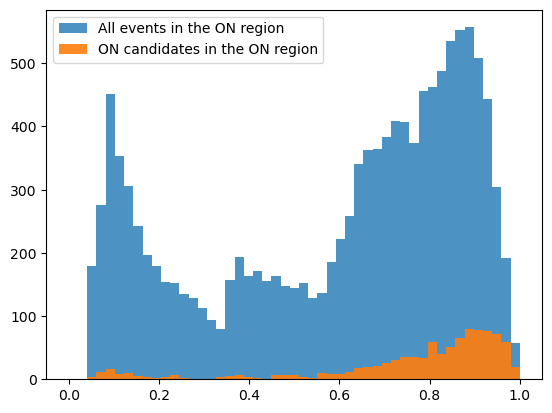

In [96]:
gsel = evt_on['GAMMANESS']
binning = np.linspace(0,1,50)
plt.hist(g,bins=binning,alpha=0.8, label="All events in the ON region")
plt.hist(gsel,bins=binning,alpha=0.9, label="ON candidates in the ON region")
plt.legend(loc='best')

What can we see?

Now, let's add a second cut based on GAMMANESS

In [121]:
evt_on_sig = events.data[cond_on * (events.data['GAMMANESS'] > 0.7)]
evt_on_bkg = events.data[cond_on * (events.data['GAMMANESS'] < 0.7)]

print(f"Events before cut: " + str(len(events.data)))
print(f"Events candidates for sig: " + str(len(evt_on_sig)))
print(f"Events candidates for bkg: " + str(len(evt_on_bkg)))

Events before cut: 12614
Events candidates for sig: 754
Events candidates for bkg: 225


## Theta2 Plot
[Go back to TOC](#Table-of-contents)


Let's define an interesting variable, the square of the angular separation between the source position and the event position

In [128]:
ra = evt_on_sig['RA'] 
dec = evt_on_sig['DEC']

th2_on = []
for i_ra,i_dec in zip(ra,dec):
    position_event = SkyCoord(  i_ra * u.deg, i_dec * u.deg, frame='icrs')
    th2_on.append( source_pos.separation(position_event)*source_pos.separation(position_event))

ra = evt_bkg['RA'] 
dec = evt_bkg['DEC']

th2_off = []
for i_ra,i_dec in zip(ra,dec):
    position_event = SkyCoord(  i_ra * u.deg, i_dec * u.deg, frame='icrs')
    th2_off.append( source_pos.separation(position_event)*source_pos.separation(position_event))
    
#th2_on

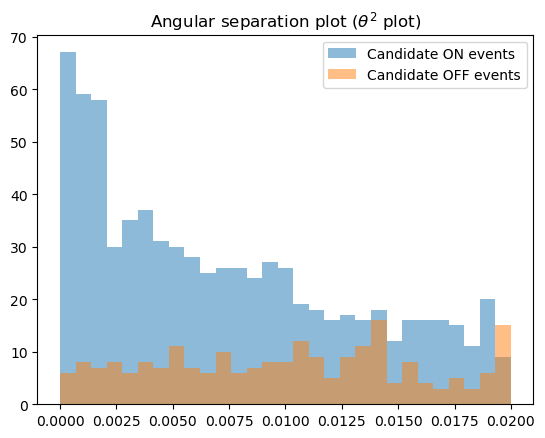

In [129]:
binning = np.linspace(0,0.02,30)
plt.hist(th2_on,bins=binning,alpha=0.5,label='Candidate ON events')
plt.hist(th2_off,bins=binning,alpha=0.5,label='Candidate OFF events')
plt.title(r'Angular separation plot ($\theta^2$ plot)')
plt.legend(loc='best')

In [ ]:
# Try with selected higher energy events?

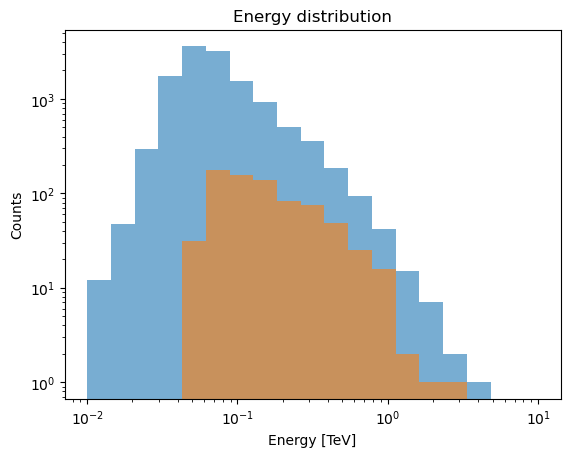

In [130]:
binning = np.logspace(-2,1,20)
plt.hist(en,bins=binning,alpha=0.6,log=True)
plt.hist(evt_on_sig['ENERGY'],bins=binning,alpha=0.6,log=True)
plt.xlabel('Energy [TeV]')
plt.ylabel('Counts')
plt.title('Energy distribution')
plt.xscale('log')

In [ ]:
# From counts --> nimber of excesss --> flux

## Final Considerations
[Go back to TOC](#Table-of-contents)

* We have opened just one file
* We are working with event counts of expected signal and background events. We need to define the EXPECTED EXCESS EVENTS
* From the EXCESS EVENTS we need to estimate a more proper value, the EXPECTED FLUX